In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx
from scipy.optimize import curve_fit
import numpy as np
import random as rd


## Random failure and targeted attacks

The relative "importance" of nodes in a network can be determined by how much it would damage the network structure if particular nodes were to be removed. 

In real life, node removal might be a person moving away and out of a social network, someone changing jobs and being removed from an email network, internet routers being attacked/overloaded and going down, etc.

We consider two types of network damage: random failure and targeted attack. In a random failure, nodes are chosen randomly for removal. In a targeted attack, we will remove nodes based on some criterion, for example, removing nodes in decreasing order of their degree centrality or other centralities.


### Random failure

Whenever we're going to engage in a distructive process, it is a good idea to make a copy of the network to preserve the original state:

In [3]:
N = 1000
p = 2e-3

G = nx.gnp_random_graph(N,p)

C = G.copy()

To simulate random failure, we randomly choose some nodes and remove them from the graph. We can use `random.sample` to remove more than one node at the same time. 

In [4]:
print('original network')
print(nx.info(G))

# select n random nodes to remove
n = 2 
nodes_to_remove = rd.sample(list(C.nodes), n)
C.remove_nodes_from(nodes_to_remove)
print('-----------------------')
print('network after node removal')
print(nx.info(C))

original network
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 986
Average degree:   1.9720
-----------------------
network after node removal
Name: 
Type: Graph
Number of nodes: 998
Number of edges: 984
Average degree:   1.9719


Instead of defining the number of nodes to be removed at each step we also can set the number of network deconstruction steps: 

In [5]:
number_of_steps = 25
n = G.number_of_nodes() // number_of_steps # integer division operator, keeps only int part 
print('# nodes to remove in each step: ', n)

# nodes to remove in each step:  40


We quantify the network deconstruction by measuring the proportion of nodes living in the largest connected component:

In [6]:


N = G.number_of_nodes()
C = G.copy()
num_nodes_removed = range(0, G.number_of_nodes(), n)


random_attack_lcc_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network lcc
    lcc = sorted(nx.connected_components(C), key = len, reverse=True)[0]
    lcc_proportion = len(lcc) / N
    random_attack_lcc_proportions.append(lcc_proportion)
    
    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > n:
        nodes_to_remove = rd.sample(list(C.nodes), n)
        C.remove_nodes_from(nodes_to_remove)

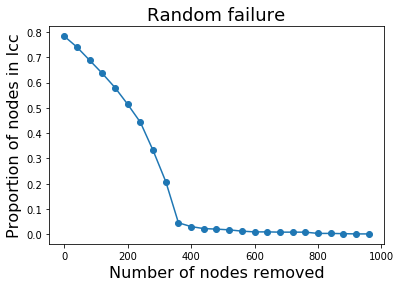

In [7]:
plt.title('Random failure', fontsize = 18)
plt.xlabel('Number of nodes removed', fontsize = 16)
plt.ylabel('Proportion of nodes in lcc', fontsize = 16)


plt.plot(num_nodes_removed, random_attack_lcc_proportions, marker='o')

The expected critical breakdown is given by

$ f_c = 1-\frac{1}{\langle k \rangle} \approx 1-\frac{1}{pN} = 0.5 $.

Since we deal with random networks the breakdown value for your particular example might lay somewhere else.

Some more trials should produce the correct result:

Text(600.0, 0.7, 'N=1000\np=0.002')

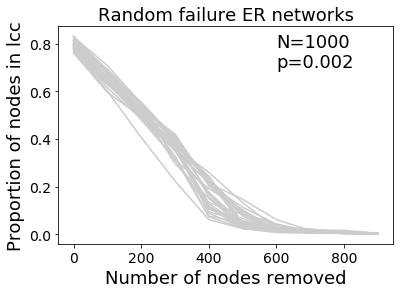

In [8]:
trials = 30

N = 1000
p = 2e-3
number_of_steps = 10
M = N // number_of_steps
num_nodes_removed = range(0, N, M)

for n in range(trials):
    G = nx.gnp_random_graph(N,p)

    C = G.copy()
    random_attack_core_proportions = []
    for nodes_removed in num_nodes_removed:
        # Measure the relative size of the network core
        lcc = sorted(nx.connected_components(C), key = len, reverse=True)[0]
        lcc_proportion = len(lcc) / N
        random_attack_core_proportions.append(lcc_proportion)
        
        # If there are more than M nodes, select M nodes at random and remove them
        if C.number_of_nodes() > M:
            nodes_to_remove = rd.sample(list(C.nodes), M)
            C.remove_nodes_from(nodes_to_remove)


    plt.plot(num_nodes_removed, random_attack_core_proportions, c = '#cccccc')



plt.title('Random failure ER networks',fontsize = 18)
plt.xlabel('Number of nodes removed',fontsize = 18)
plt.ylabel('Proportion of nodes in lcc',fontsize = 18)
plt.tick_params(axis='both', which='major',labelsize=14)
plt.text(.6*N,.7,'N=%s\np=%s' %(N,p),fontsize = 18)

---
# Exercise 1

Consider the power grid of the American states in the west (`powergrid.edgelist`).

>(i) Determine the critical breakdown for random failures. Average over many trials. (4 pts)

>(ii) Simulate targeted attacks against the power grid. Attack the most central nodes by both degree and closeness. (8 pts)

Show your results in figures similar to the one generated in the cell above.
 
Hints: When you iterate through the node removal you don't need to go through the complete node list. Find a reasonable maximal number.

Keep in mind that calculating closeness centrality is computationally expensive. Use a reasonable step size n.

(My loop ran about 10 mins so don't panic if your script is a little busy for a while. However, it should also not run much longer.)

---


## Bernoulli percolation

The Bernoulli or bond percolation is the counter part of site percolation (pebbels on a board) that we have discussed in the lecture. Both acts on regular lattices but here a bond or edge in the terminology of networks are either open (existing) or closed (not existing). 

Each bond is independently open with probability $p$ in $[0,1]$ and closed with probability $q=1-p$.

Let us initiate the problem by considering a two-dimensional lattice as given directly by the `networkx` function `grid_2d_graph`:


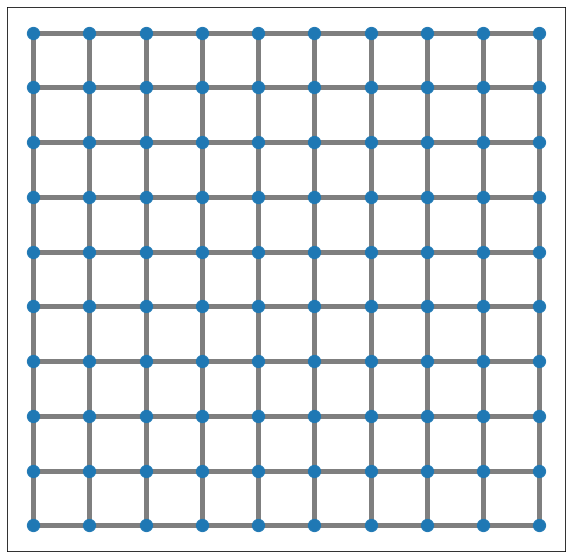

In [43]:
L = 10
G_grid = nx.grid_2d_graph(L,L)

pos = {}

for n in G_grid.nodes():
    pos[n] = (n[0],n[1])
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G_grid,pos=pos,node_size = 150)
nx.draw_networkx_edges(G_grid,pos = pos,edge_color='k',width = 5,alpha = .5)

---
# Exercise 2

> (i) Take the grid network from above and remove randomly the bonds (edges) with the following probability values $p=0.3$,$p=0.4$ and $p=0.6$. Depict the result in the same way as shown in the previous cell. Color the edges of the largest connected component differently so that the percolation cluster can be easily identified. (3 pts)

> (ii) Iterate through a range of probability values in $[0,1]$ and measure the growth of the lcc. Provide a diagram. What is the critical percolation probability? Confirm your finding by simulating a larger lattice. (3 pts)

> (iii) Can you find a function that fits your results? It should have only one single parameter accounting for the lattice size. (2 pts)

---

In [16]:
list_2 = [2,43,64,78,34,8]
def listsum(list_2):
    total = 0
    i = 0
    while i < len(list_2):
        total = total + list_2[i]
        i = i + 1
    return total
totalsum = listsum(list_2);
print('Sum of List: ', totalsum)


Sum of List:  229


In [17]:
dict_1={'mango':900, 'apple': 1100, 'orange': 2300, 'banana': 1050, 'melon': 3200}
d_rotten = {'mango': 'rotten', 'apple': 'fresh', 'orange':'fresh', 'banana': 'brown', 'melon': 'rotten'}

roten=[]
number_rot=0
num_fresh=0
for key, val in d_rotten.items():
  if val == 'rotten':
    roten.append(key)
    number_rot += dict_1[key]
print('Rotten fruits', roten)
print('Number of rotten fruits=', number_rot)

amount_fresh = sum(dict_1.values()) - number_rot
print("Fresh fruits=", amount_fresh)


Rotten fruits ['mango', 'melon']
Number of rotten fruits= 4100


TypeError: 'int' object is not callable

In [20]:
fresh_f=0
rotten_f=0

for key in dict_1.keys():
    if d_rotten[key] == "rotten":
        rotten_f += dict_1[key]
    elif d_rotten[key] == "fresh":
        fresh_f += dict_1[key]
print("number of rotten fruits: ",rotten_f)
print("number of fresh fruits: ",fresh_f)


number of rotten fruits:  4100
number of fresh fruits:  3400
